In [1]:
!pip install xgboost==1.0 graphviz

     |████████████████████████████████| 109.7 MB 19 kB/s s eta 0:00:01██████▊           | 71.2 MB 77.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import boto3
sm = boto3.client('sagemaker')

In [3]:
job_name = 'tuning-job-1-91a289d8ed9f4ebeb4-002-2db7f2c5'
respone = sm.describe_training_job(TrainingJobName=job_name)
model_url = respone['ModelArtifacts']['S3ModelArtifacts']
model_url

's3://beyoung-fraud-detection-20200803/sagemaker/autopilot-fraud-detection/output/automl-fraud-03-09-44-39/tuning/automl-fra-dpp0-xgb/tuning-job-1-91a289d8ed9f4ebeb4-002-2db7f2c5/output/model.tar.gz'

In [4]:
!aws s3 cp {model_url} ./model.tar.gz

download: s3://beyoung-fraud-detection-20200803/sagemaker/autopilot-fraud-detection/output/automl-fraud-03-09-44-39/tuning/automl-fra-dpp0-xgb/tuning-job-1-91a289d8ed9f4ebeb4-002-2db7f2c5/output/model.tar.gz to ./model.tar.gz


In [5]:
!tar -xvf ./model.tar.gz

xgboost-model


In [6]:
import pickle
import xgboost as xgb
import numpy as np
transaction= "-1.009630,0.141192,0.167167,-0.808785,2.112167,-1.294934,0.592454,-0.049872,-0.284882,-1.296757,-1.010293,-0.272631,-0.139809,-0.918097,-0.475136,0.519497,0.158822,-0.120745,-0.519128,0.108956,-0.225473,-0.947079,0.054725,0.368866,-0.158482,0.070904,0.022035,0.177674,-0.279746,0.391123"
test = transaction.split(',')
data = np.asarray(test).reshape((1,-1))
test_matrix = xgb.DMatrix(data)
filename = "./xgboost-model"
xgb_loaded = pickle.load(open(filename, 'rb'))
predictions = xgb_loaded.predict(test_matrix)
predictions[0]

0.00015989364

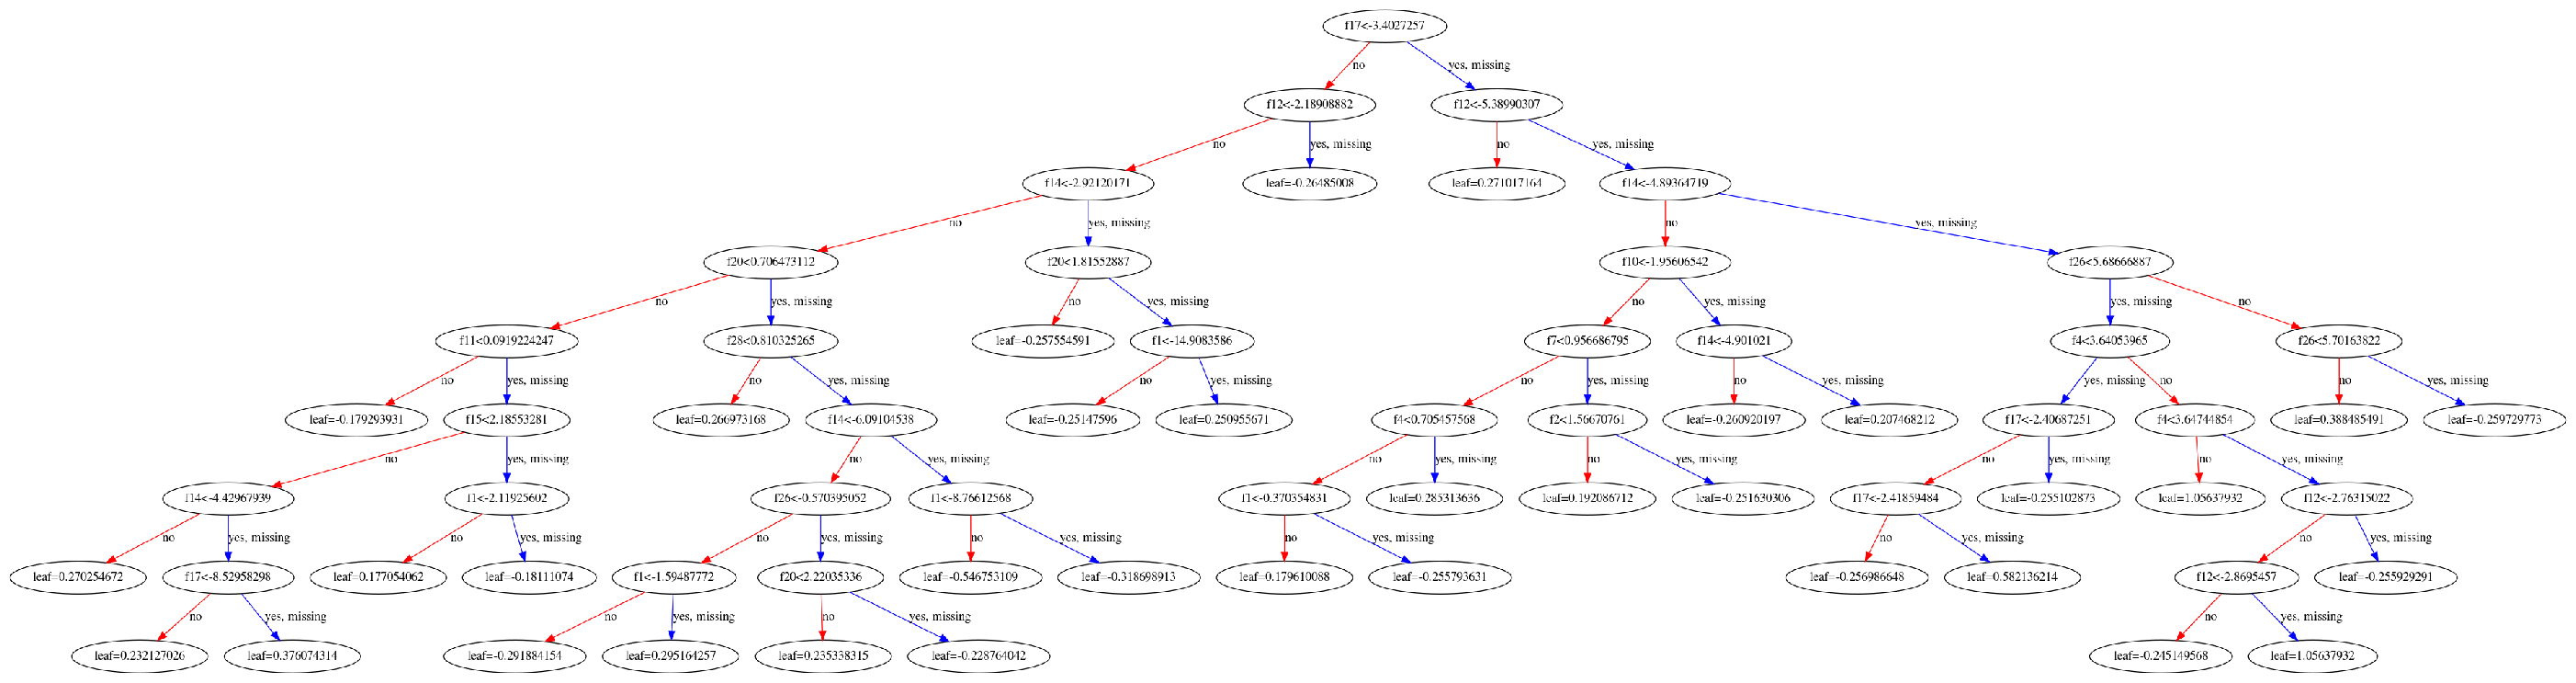

In [9]:
from xgboost import plot_tree, Booster
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle as pkl
from xgboost import plot_tree, plot_importance
from matplotlib.pylab import rcParams

filename='./xgboost-model'
# plot single tree
rcParams['figure.figsize'] = 50,50
 
model = pkl.load(open(filename,'rb')) 
plot_tree(model, num_trees=5)
plt.show()